In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install fluidsynth # install fluidsynth

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fluidsynth is already the newest version (2.2.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
! wget https://github.com/FluidSynth/fluidsynth/raw/master/sf2/FluidR3_GM.sf2

--2024-11-28 05:47:53--  https://github.com/FluidSynth/fluidsynth/raw/master/sf2/FluidR3_GM.sf2
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-28 05:47:54 ERROR 404: Not Found.



In [ ]:
!pip install music21
!pip install tensorflow
!pip install tqdm
!pip install midi2audio

Processing file: /content/MIDI-Unprocessed_053_PIANO053_MID--AUDIO-split_07-06-17_Piano-e_3-04_wav--2.midi
MIDI file successfully parsed.
Extracted 821 notes and chords.
Corpus created with 821 elements.
Sample notes/chords from the corpus: ['E-4', 'G#2', 'G#4', '8.0', '8.10', '10.1.3', '8.11.2.3', '8.0', '8.0.3', '1.3.8']


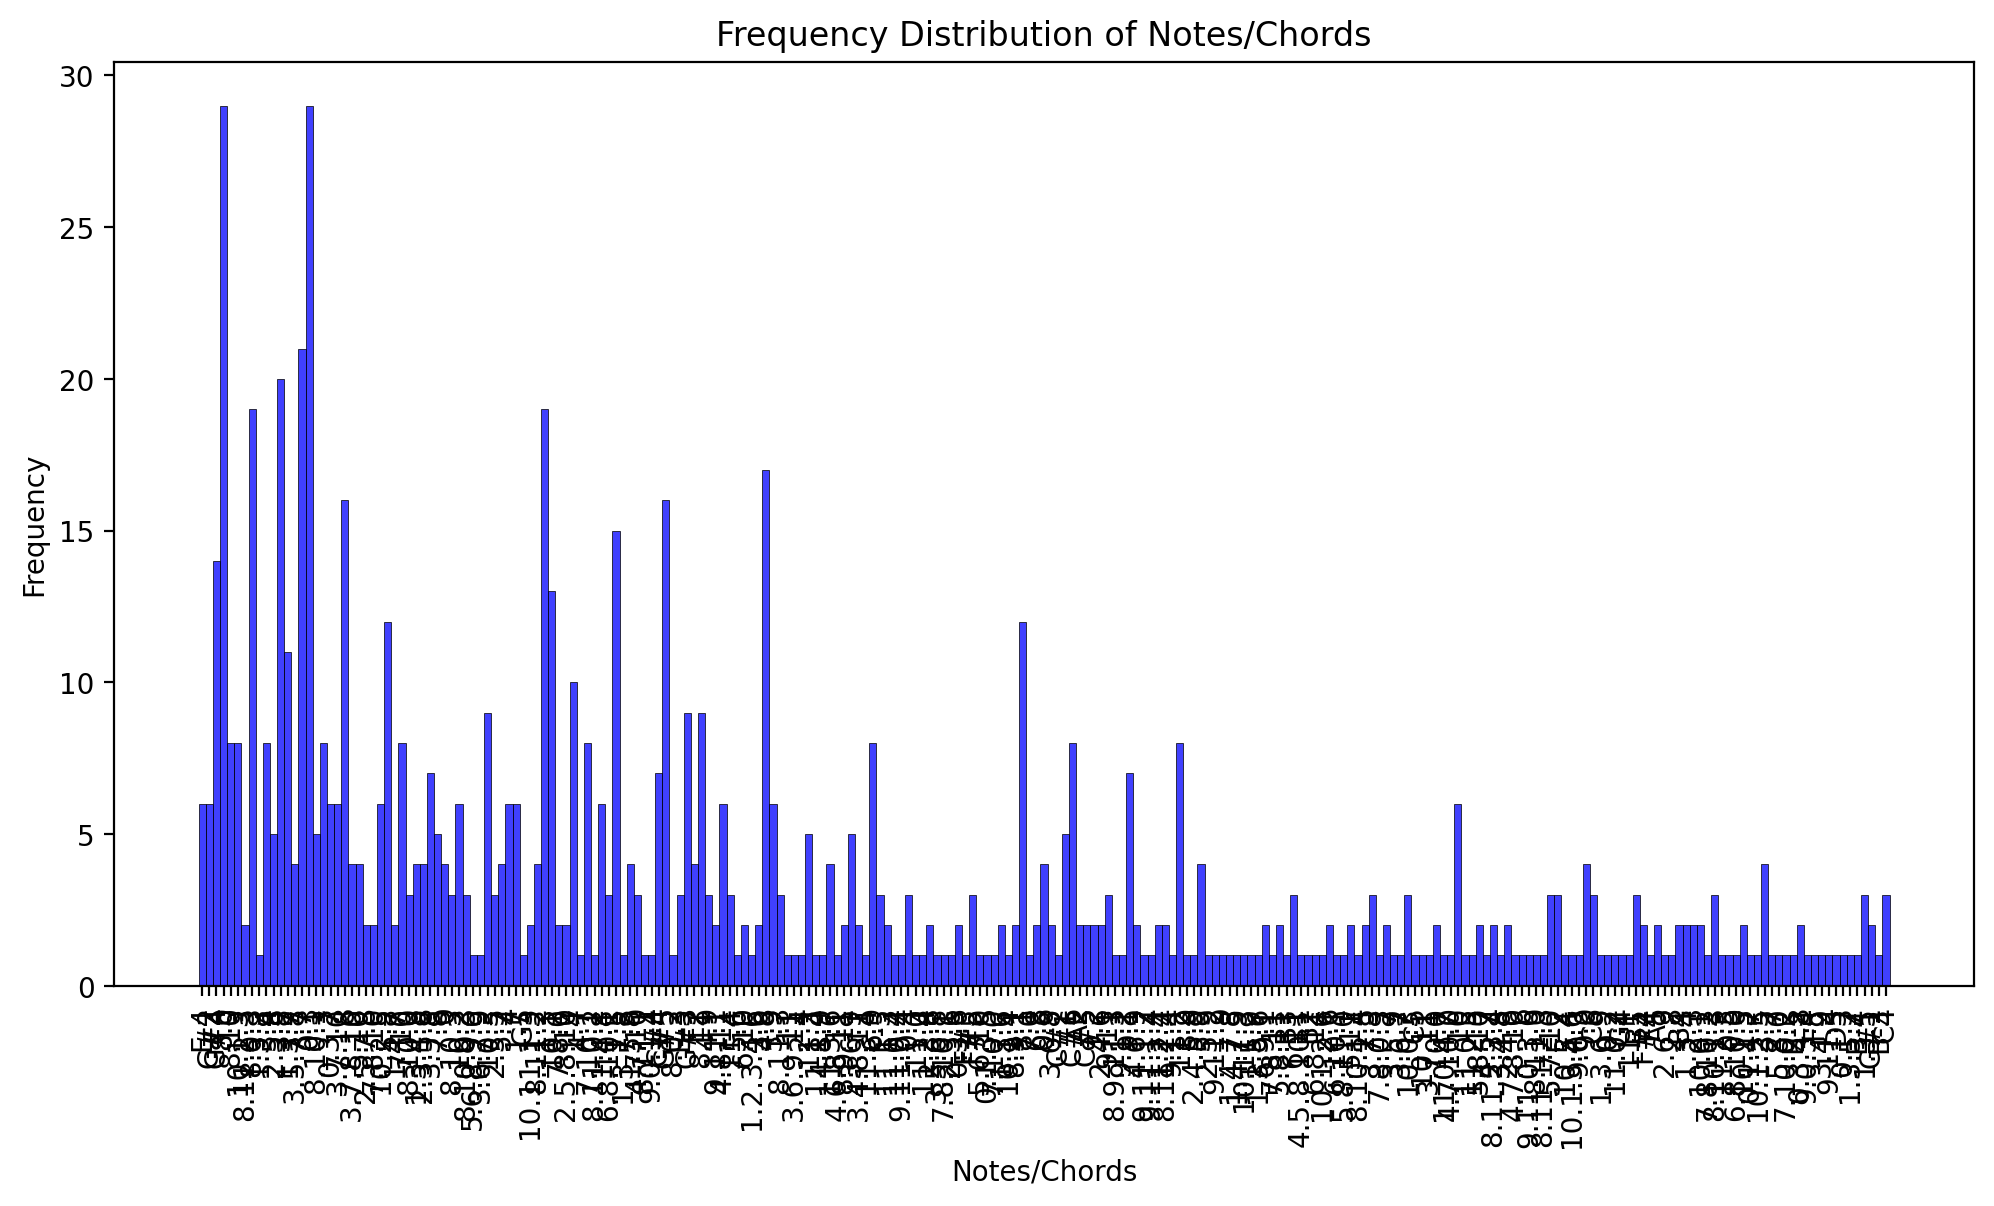

In [ ]:
# Importing Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from music21 import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
import seaborn as sns
from tqdm import tqdm
import os
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Function to parse and process a single MIDI file
def process_midi_file(file_path):
    # Check if the file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    print(f"Processing file: {file_path}")
    try:
        # Parse the MIDI file
        midi = converter.parse(file_path)
        print("MIDI file successfully parsed.")
        return midi
    except Exception as e:
        print(f"Error parsing MIDI file: {e}")
        return None

# Function to extract notes and chords from a MIDI object
def extract_notes(midi_object):
    notes = []
    try:
        # Partition by instrument
        parts = instrument.partitionByInstrument(midi_object)
        for part in parts.parts:
            elements = part.recurse()
            for element in elements:
                # Process notes
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                # Process chords
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))
        print(f"Extracted {len(notes)} notes and chords.")
    except Exception as e:
        print(f"Error extracting notes: {e}")
    return notes

# Main script
if __name__ == "__main__":
    # User input: Path to a single MIDI file
    file_path = "/content/MIDI-Unprocessed_053_PIANO053_MID--AUDIO-split_07-06-17_Piano-e_3-04_wav--2.midi"

    # Step 1: Process the MIDI file
    midi_object = process_midi_file(file_path)

    if midi_object:
        # Step 2: Extract notes and chords
        corpus = extract_notes(midi_object)

        # Step 3: Display Corpus information
        print(f"Corpus created with {len(corpus)} elements.")
        print("Sample notes/chords from the corpus:", corpus[:10])

        # Step 4: Visualize note/chord frequency distribution
        plt.figure(figsize=(12, 6))
        sns.histplot(corpus, kde=False, bins=50, color="blue")
        plt.title("Frequency Distribution of Notes/Chords")
        plt.xlabel("Notes/Chords")
        plt.ylabel("Frequency")
        plt.xticks(rotation=90)
        plt.show()


In [ ]:
from collections import Counter
  count_num = Counter(corpus
# Getting a list of rare chords
    rare_note = []
    for index, (key, value) in enumerate(count_num.items()):
        if value < 100:
            m = key
            rare_note.append(m)

    print("Total number of notes that occur less than 100 times:", len(rare_note))

NameError: name 'count_num' is not defined

In [ ]:
corpus

['E-4',
 'G#2',
 'G#4',
 '8.0',
 '8.10',
 '10.1.3',
 '8.11.2.3',
 '8.0',
 '8.0.3',
 '1.3.8',
 '3.4',
 '2.5.8',
 '3.8',
 '1.3.7',
 '3.5.7.8',
 '3.7',
 '8.0',
 '0.3',
 '8.10.1',
 '3',
 '8.0.3',
 '8.10.1',
 '0.3.7',
 '3.7.10',
 '8',
 '8.0',
 '3.7.8.10',
 '8.0.3',
 '5.10',
 '2.5.7.8',
 '7.8.10',
 '10.2.5',
 '5.8',
 '3.4',
 '1.4.7',
 '3.7.10',
 '1.3.7',
 '7.10',
 '8',
 '8.10.0',
 '10.1.3',
 '8.11.2.3',
 '8.0.3',
 '8.0.3',
 '1.3.4.8',
 '2.3.5.8',
 '3.8',
 '1.3.7',
 '3.5.8',
 '3.7',
 '7.8',
 '0',
 '3.8',
 '10.1.3',
 '8.0.3',
 '8.10.3',
 '10.2',
 '8.10.0.3',
 '10.2.5',
 '3',
 '3.7',
 '3.5.8',
 '5.6.8.9.0',
 '3.6.7.9',
 '7.10',
 '10.3',
 '8.10.0.3',
 '2.5.8',
 '2.3.5',
 '5.7',
 '3.8',
 '4',
 '1.7',
 '3.7',
 '3',
 'G5',
 '3.8',
 '8.0',
 '8.10',
 '10.11.1.3',
 '8.11.2',
 '8.0',
 '8.0.3',
 '1.3',
 '3.4',
 '2.3.5.8',
 '3.8',
 '1.3.7',
 '3.5.7.8',
 '3.7',
 '8.0',
 '8.0.3',
 '10.1.3',
 '8.0.3',
 '8.10',
 '10.1',
 '0.3.7',
 '3.7.10',
 '8',
 '7.8.0',
 '3.7.8.10',
 '8.0.3',
 '5.10',
 '2.5.8.10',
 '7.8',

In [ ]:
!apt-get install muse-score

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package muse-score


In [ ]:
import numpy as np
import tensorflow as tf

# Load the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/SML_Music_final/model_100.keras')

# Create a mapping from unique notes/chords to integers (if not already done)
# Assuming you have a 'unique_notes' list created in previous steps
unique_notes = sorted(list(set(corpus))) # Or load from a saved file
note_to_int = dict((note, number) for number, note in enumerate(unique_notes))
int_to_note = dict((number, note) for number, note in enumerate(unique_notes))

# Function to prepare input sequences for prediction
def prepare_sequences(notes, n_vocab):
    sequence_length = 100  # Adjust as needed
    network_input = []
    for i in range(0, len(notes) - sequence_length, 1):
        sequence_in = notes[i:i + sequence_length]
        # Handle unknown notes/chords during sequence preparation
        network_input.append([note_to_int.get(char, 0) for char in sequence_in]) # Use 0 or another default index for unknown notes
    n_patterns = len(network_input)
    normalized_input = np.reshape(network_input, (n_patterns, sequence_length, 1))
    normalized_input = normalized_input / float(n_vocab)
    return network_input, normalized_input

# Prepare input sequences
network_input, normalized_input = prepare_sequences(corpus, len(unique_notes))

# Generate notes/chords
start = np.random.randint(0, len(network_input)-1)
int_prediction = []
pattern = network_input[start]
prediction_output = []

for note_index in range(500): # Generate 500 notes/chords
    prediction_input = np.reshape(pattern, (1, len(pattern), 1))
    prediction_input = prediction_input / float(len(unique_notes))
    prediction = model.predict(prediction_input, verbose=0)
    index = np.argmax(prediction)
    # Handle the case where the predicted index is out of range
    result = int_to_note.get(index, unique_notes[0])  # Get the note if index is valid, otherwise use a default note (e.g., the first note in unique_notes)
    prediction_output.append(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]

prediction_output

['2.6.9',
 '0',
 '2.6.9',
 '1.2.3.4.6',
 '0',
 '6.10.1',
 '3.4.9',
 '2.5',
 '2.5',
 '2.5',
 '0',
 '8.11.1',
 '0.6',
 '1.3.6',
 '7',
 '4.7',
 '3.4.9',
 '3.6.9',
 '11',
 '2.6',
 'C6',
 '4',
 'B-4',
 '4',
 'B-4',
 '3.6.9',
 '3.7',
 '0',
 '2.5.8',
 '2.6.9',
 'D5',
 '3.5.6.8',
 '10.1.5',
 '0.4',
 'C6',
 '10.1',
 '10.1',
 '11.0',
 '10.0.3',
 '9.11.0.3.6',
 'D5',
 '2.4',
 '10.1.5',
 '1',
 'C6',
 '11',
 'B-3',
 '0',
 '8.11.1',
 '4.8.9',
 'C6',
 '0.4',
 '11',
 'D5',
 '0.5',
 '4.7.10',
 '8.11.1',
 '4.7.10.0',
 '8.9.1',
 '8.11.3',
 'D5',
 '4.7',
 '11.2.5',
 '11.0',
 'B-4',
 '8.11.1.2.3',
 '8.11.2.4',
 'E-2',
 '8.11.3',
 '8.11.2',
 '8.11.2.3',
 '7.8',
 'E-2',
 'D5',
 'D5',
 '8.11.3',
 '7.8.0',
 'B-5',
 'E-2',
 '8.9',
 'B-5',
 '8.11.2',
 '9.11',
 '9.2',
 '7.8.0',
 'E-3',
 '9.2',
 '7.8',
 '9.2',
 '9.2',
 'C#6',
 '7.8.0',
 'E-3',
 '7.8.0',
 '9.2',
 '7.8.0',
 '8.11.2.3',
 '7.8',
 '8.10',
 '9.2',
 '7.8.0',
 '7',
 '6.9',
 '7.8.0',
 '7',
 '6.8.11',
 'A2',
 '7.10.1',
 '6.9',
 '10.1.3',
 '8.11.3',
 '11.2.3

In [ ]:
# base on prediction_output make a midi file

from music21 import *

def create_midi(prediction_output):
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(int(current_note))
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        # pattern is a note
        else:
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 0.5

    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='test_output.mid')

create_midi(prediction_output)

##
**MIDI to Wav **

In [ ]:
from midi2audio import FluidSynth
from google.colab import files

def convert_midi_to_wav(midi_file_path, output_wav_path):
    """Converts a MIDI file to a WAV file using FluidSynth.

    Args:
        midi_file_path: Path to the MIDI file.
        output_wav_path: Path to save the generated WAV file.
    """
    # Specify the path to the soundfont
    soundfont_path = "/content/drive/MyDrive/SML_Music_final/FluidR3_GM.sf2"  # Update if you placed the soundfont elsewhere

    fs = FluidSynth(sound_font=soundfont_path) # Pass the soundfont path
    fs.midi_to_audio(midi_file_path, output_wav_path)

if __name__ == '__main__':
    midi_file_path = '/content/test_output.mid'  # Replace with your MIDI file path
    output_wav_path = '/content/drive/MyDrive/SML_Music_final/generated_music.wav'  # Replace with your desired WAV file path
    convert_midi_to_wav(midi_file_path, output_wav_path)
    print(f"WAV file saved to: {output_wav_path}")

    files.download(output_wav_path)

WAV file saved to: /content/drive/MyDrive/SML_Music_final/generated_music.wav


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>